In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import reverse_geocoder as rg
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:/Users/EfrenMariscal/Documents/data scientific/bases de datos/terremotos.csv")
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [3]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [4]:
df_tsunami = df.loc[df["tsunami"]>0]
df_tsunami

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
5,7.0,4,3,755,142,4.578,26.0,660.000,-26.0442,178.381,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,6.9,5,5,904,562,0.000,23.7,145.000,1.1350,-77.393,2013,2,1
409,7.1,9,6,780,334,0.000,16.5,21.000,-10.9280,166.018,2013,2,1
410,6.8,0,7,711,400,0.000,17.5,12.000,-10.8380,165.969,2013,2,1
411,6.7,0,6,691,387,0.000,26.5,11.000,-10.9970,165.655,2013,2,1


In [5]:
df_tsunami.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.0
mean,6.938487,4.970395,5.694079,863.845395,42.065789,2.440036,28.571382,85.656796,-0.335356,32.401155,2017.226974,6.467105,1.0
std,0.423250,3.084473,1.474256,318.637455,126.206896,2.423971,28.457071,151.080342,30.292110,135.917334,2.958089,3.450580,0.0
min,6.500000,0.000000,2.000000,650.000000,0.000000,0.000000,0.000000,5.000000,-61.848400,-179.968000,2013.000000,1.000000,1.0
25%,6.600000,2.750000,5.000000,691.000000,0.000000,0.654100,15.000000,13.807500,-20.129125,-86.942475,2015.000000,4.000000,1.0
50%,6.800000,6.000000,6.000000,755.000000,0.000000,1.635500,21.000000,26.971500,-6.036600,125.037000,2017.000000,7.000000,1.0
75%,7.100000,8.000000,7.000000,880.750000,0.000000,3.752000,32.250000,61.147500,16.033600,155.453250,2020.000000,9.250000,1.0
max,8.300000,9.000000,9.000000,2910.000000,770.000000,17.654000,229.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.0


## Clasificacion de variables
**tsunami**: Qualitative Variable\
**Month**: Qualitative variable\
**Year**: Quantitative variable\
**longitude**: Quantitative variable\
**latitude**: Quantitative variable\
**depth**: Quantitative variable\
**gap**: Quantitative variable\
**dmin**: Quantitative variable\
**nst**: Quantitative variable\
**sig**: Quantitative variable\
**mmi**: Qualitative variable\
**cdi**: Qualitative variable\
**magnitude**: Quantitative variable

## Descripción de las variables
**tsunami**: Variable that defines whether or not there was an earthquake. **1 indicates yes** and **0 no**\
**Month**: Month the earthquake occurred\
**Year**: Year the earthquake occurred\
**longitude**: Longitude of the earthquake's epicenter\
**latitude**: Latitude of the earthquake's epicenter\
**depth**: Focal depth of the earthquake in kilometers (km)\
**gap**: Azimuthal Gap between stations. Measures the largest angular gap without a station in the circle around the epicenter\
**dmin**: Distance to nearest station, in degrees\
**nst**: Number of Stations used to calculate the epicenter's location\
**sig**: Event Significance It is a calculated value that combines several factors (magnitude, MMI, number of deaths, etc.) to give an overall hazard score for the event.\
**mmi**: Modified Mercalli Intensity. Measures the effect of the earthquake on the surface (buildings, infrastructure, and environment).\
**cdi**: Community Decimal Intensity. Measures how strongly people felt the earthquake in a given area. Based on eyewitness reports.\
**magnitude**: Earthquake magnitude (Richter scale or equivalent, such as moment magnitude). Measures the energy released at the epicenter. High Relevance: It is the primary predictor of a tsunami; the higher the magnitude, the greater the potential.

In [6]:
print(df.tsunami.value_counts())
print("")
print(df.cdi.value_counts())
print("")
print(df.mmi.value_counts())
print("")
print(df.Month.value_counts())
print("")
print(df.Year.value_counts())

tsunami
0    478
1    304
Name: count, dtype: int64

cdi
0    212
5    107
7     97
8     86
6     77
9     66
4     62
3     47
1     14
2     14
Name: count, dtype: int64

mmi
7    209
6    203
5    142
4     87
8     68
3     40
9     28
2      4
1      1
Name: count, dtype: int64

Month
11    80
9     80
4     77
1     70
10    69
8     68
3     63
2     63
5     58
7     56
12    56
6     42
Name: count, dtype: int64

Year
2015    53
2013    53
2014    48
2018    43
2016    43
2021    42
2010    41
2022    40
2007    37
2017    36
2011    34
2019    33
2004    32
2012    31
2003    31
2005    28
2001    28
2020    27
2009    26
2006    26
2008    25
2002    25
Name: count, dtype: int64


## Analyzing variables
Next, an analysis of each variable will be carried out independently. The analysis will be based on the type of variable. The analysis for each variable will be as follows:\
**tsunami**: Qualitative (categorical) nominal variable --> bar / countplot()\
**Month**: Qualitative (categorical) ordinal variable --> bar / countplot()\
**Year**: Discrete quantitative variable --> bars / countplot() will be used to avoid clustering\
**longitude**: Continuous quantitative variable --> histogram / hisplot()\
**latitude**: Continuous quantitative variable histogram / hisplot()\
**depth**: Continuous quantitative variable histogram / hisplot()\
**gap**: Continuous quantitative variable histogram / hisplot()\
**dmin**: Continuous quantitative variable histogram / hisplot()\
**nst**: Discrete quantitative variable histogram / hisplot()\
**sig**: Discrete quantitative variable histogram / histplot()\
**mmi**: Qualitative variable ordinal --> bar/ countplot() \
**cdi**: Ordinal qualitative variable --> bar/ countplot() \
**magnitude**: Continuous quantitative variable --> histogram/ histplot()

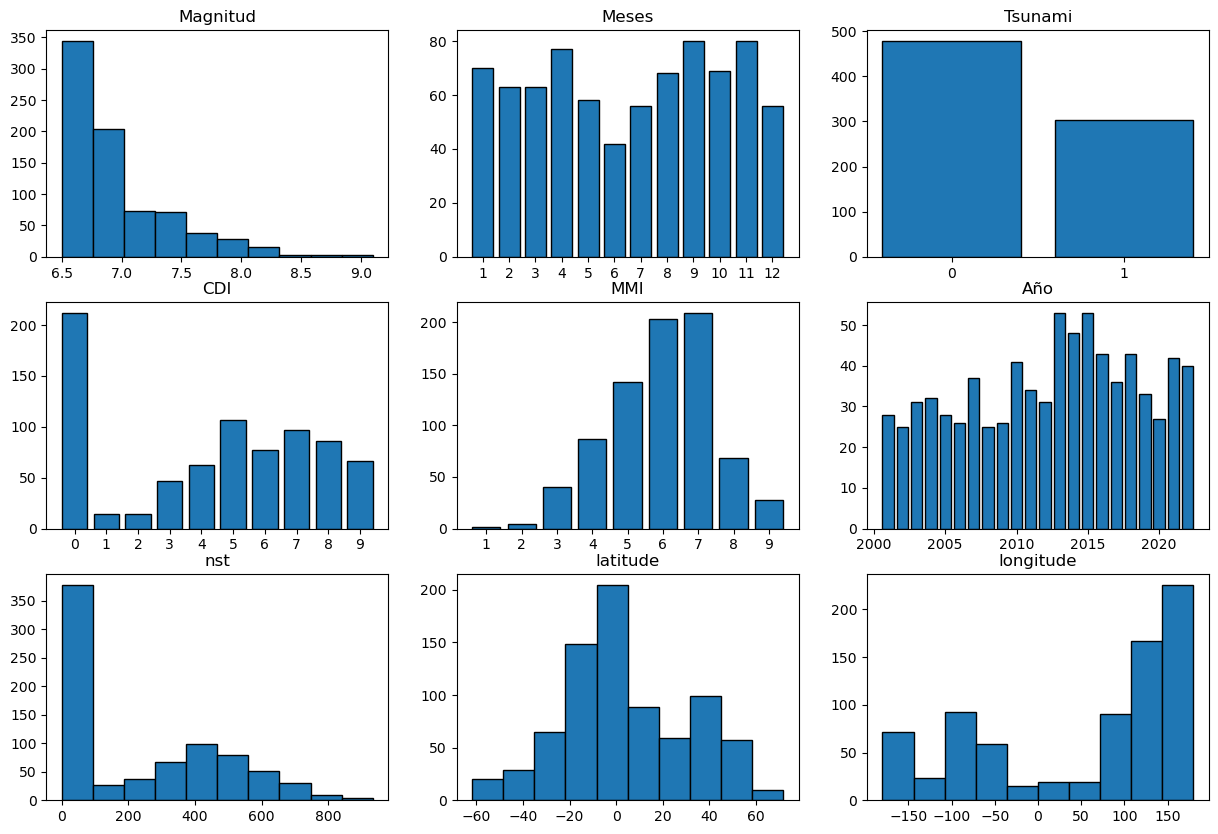

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[0,2]
ax4=ax[1,0]
ax5=ax[1,1]
ax6=ax[1,2]
ax7=ax[2,0]
ax8=ax[2,1]
ax9=ax[2,2]


ax1.set_title("Magnitud")
ax1.hist(df.magnitude,edgecolor="black")

ax2.set_title("Meses")
meses=df.Month.value_counts().sort_index()
ax2.bar(meses.index,meses.values,edgecolor="black")
ax2.set_xticks(meses.index,meses.index)

ax3.set_title("Tsunami")
tsunami=df.tsunami.value_counts().sort_index()
ax3.bar(tsunami.index,tsunami.values,edgecolor="black")
ax3.set_xticks(tsunami.index,tsunami.index)

ax4.set_title("CDI")
cdi=df.cdi.value_counts().sort_index()
ax4.bar(cdi.index,cdi.values,edgecolor="black")
ax4.set_xticks(cdi.index,cdi.index)

ax5.set_title("MMI")
mmi=df.mmi.value_counts().sort_index()
ax5.bar(mmi.index,mmi.values,edgecolor="black")
ax5.set_xticks(mmi.index,mmi.index)

ax6.set_title("Año")
año=df.Year.value_counts().sort_index()
ax6.bar(año.index,año.values,edgecolor="black")

ax7.set_title("nst")
ax7.hist(df.nst,edgecolor="black")

ax8.set_title("latitude")
ax8.hist(df.latitude,edgecolor="black")

ax9.set_title("longitude")
ax9.hist(df.longitude,edgecolor="black");
#ax6.hist(df.Year,edgecolor="black");
#ax6.set_xticks(año.index,año.index);

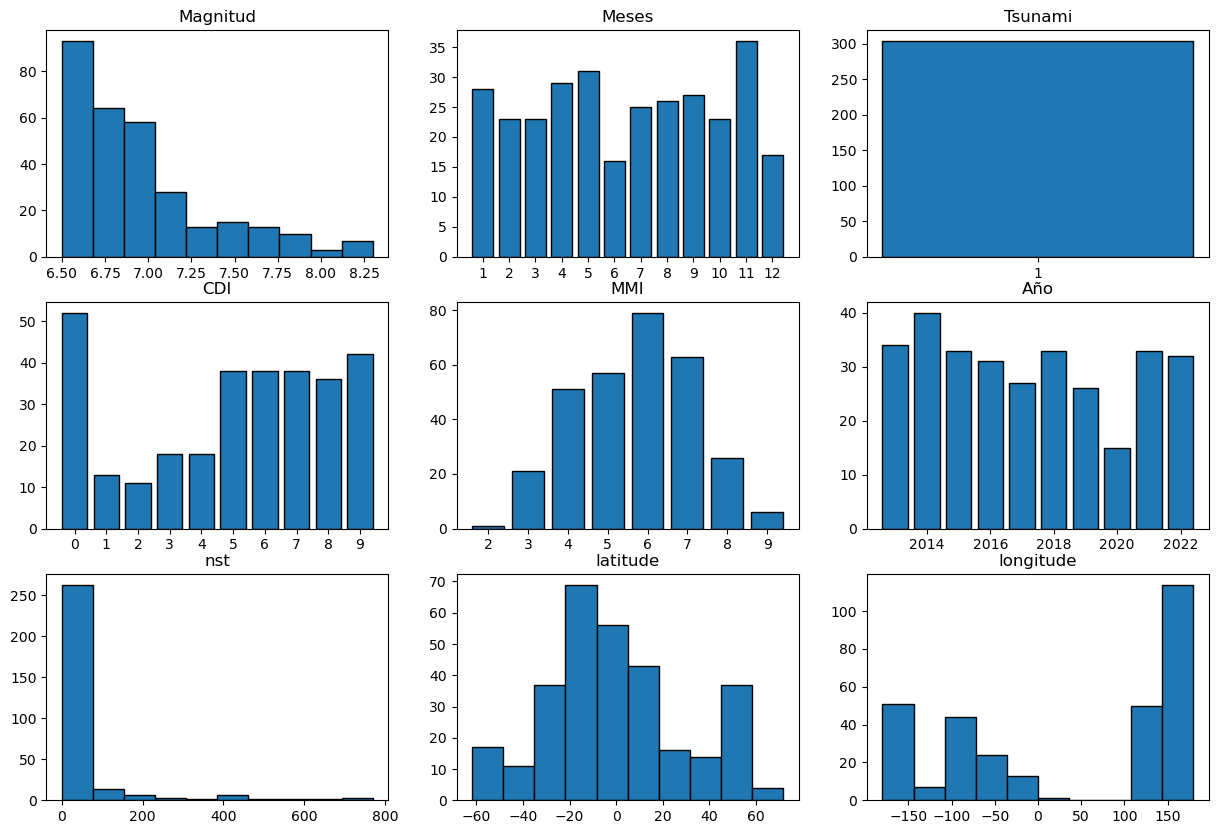

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[0,2]
ax4=ax[1,0]
ax5=ax[1,1]
ax6=ax[1,2]
ax7=ax[2,0]
ax8=ax[2,1]
ax9=ax[2,2]


ax1.set_title("Magnitud")
ax1.hist(df_tsunami.magnitude,edgecolor="black")

ax2.set_title("Meses")
meses=df_tsunami.Month.value_counts().sort_index()
ax2.bar(meses.index,meses.values,edgecolor="black")
ax2.set_xticks(meses.index,meses.index)

ax3.set_title("Tsunami")
tsunami=df_tsunami.tsunami.value_counts().sort_index()
ax3.bar(tsunami.index,tsunami.values,edgecolor="black")
ax3.set_xticks(tsunami.index,tsunami.index)

ax4.set_title("CDI")
cdi=df_tsunami.cdi.value_counts().sort_index()
ax4.bar(cdi.index,cdi.values,edgecolor="black")
ax4.set_xticks(cdi.index,cdi.index)

ax5.set_title("MMI")
mmi=df_tsunami.mmi.value_counts().sort_index()
ax5.bar(mmi.index,mmi.values,edgecolor="black")
ax5.set_xticks(mmi.index,mmi.index)

ax6.set_title("Año")
año=df_tsunami.Year.value_counts().sort_index()
ax6.bar(año.index,año.values,edgecolor="black")

ax7.set_title("nst")
ax7.hist(df_tsunami.nst,edgecolor="black")

ax8.set_title("latitude")
ax8.hist(df_tsunami.latitude,edgecolor="black")

ax9.set_title("longitude")
ax9.hist(df_tsunami.longitude,edgecolor="black");

## WHAT CHARACTERISTICS MAKE A TSUNAMI MORE LIKELY?

**LET'S START WITH:**
* *TSUNAMI-DEPTH*
* *TSUNAMI-MAGNITUDE*
* *TSUNAMI-LOCATION*

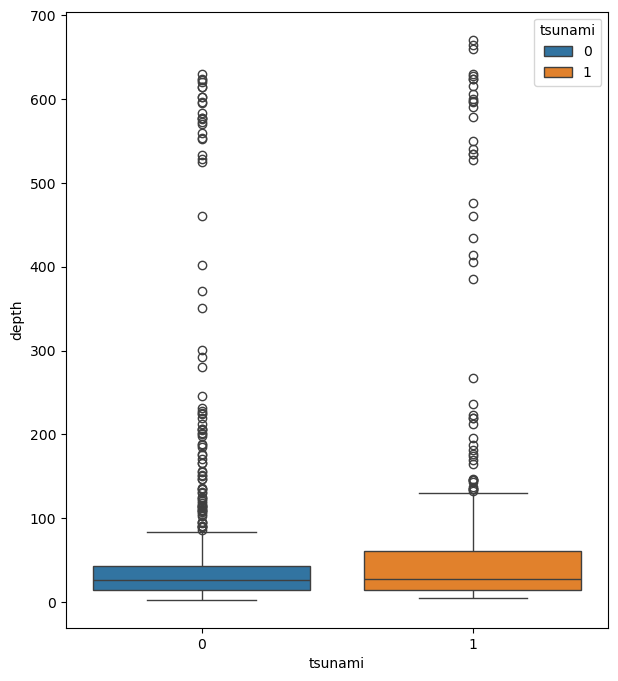

In [11]:
#DEPTH - TSUNAMI
plt.figure(figsize=(7, 8))
sns.boxplot(data=df,x="tsunami",y="depth",hue="tsunami");

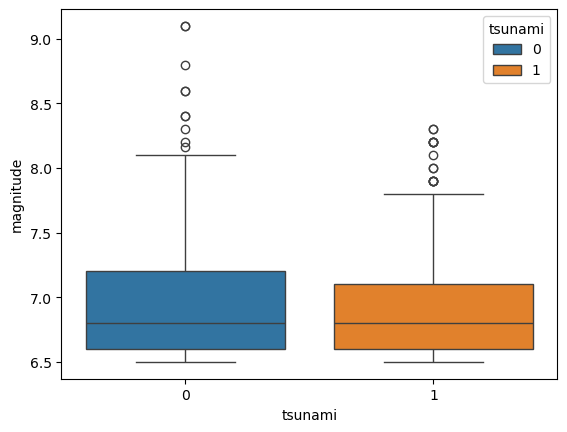

In [12]:
#MAGNITUDE-TSUNAMI
sns.boxplot(x="tsunami",y="magnitude",hue="tsunami",data=df);

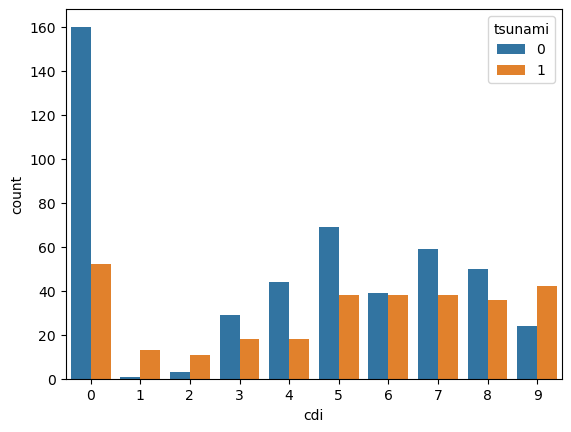

In [13]:
#CDI-TSUNAMI
#cdi es una medida que indica cuanto sintio la gente el temblor. La grafica indica que una gran parte de los tsunamis la gente 
#no los sintio o los sintio muy poco. Esto indica que los terremotos ocurrieron en el mar o lejos de la zonas pobladas.
sns.countplot(x="cdi",hue="tsunami",data=df);

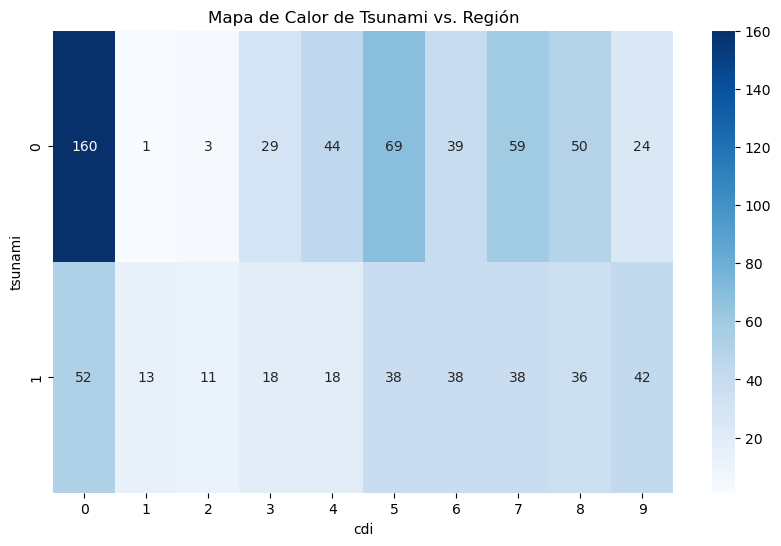

In [14]:
tabla_conteo = pd.crosstab(df['tsunami'], df['cdi'])
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_conteo, 
            annot=True,     
            fmt='d',        
            cmap='Blues')   
plt.title('Mapa de Calor de Tsunami vs. Región');

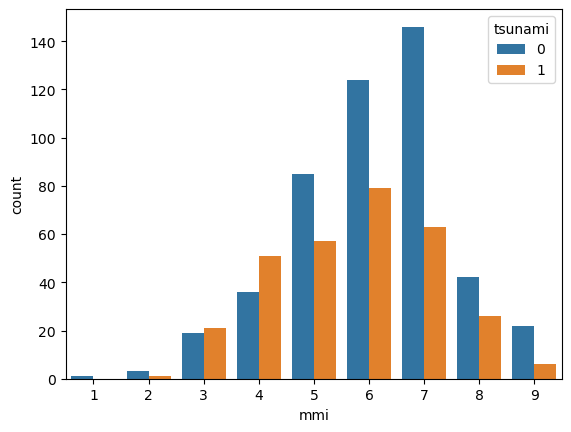

In [15]:
#MMI-TSUNAMI
sns.countplot(x="mmi",hue="tsunami",data=df);

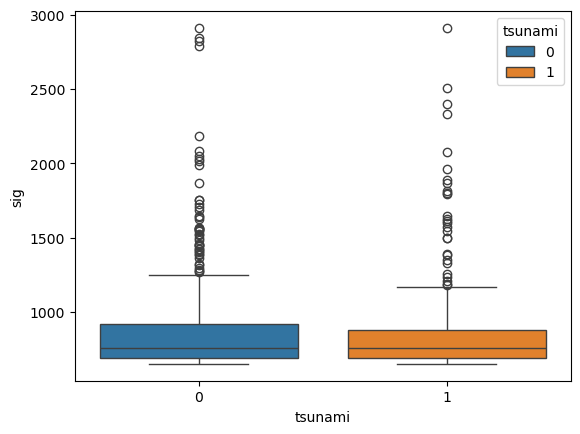

In [16]:
#SIG-TSUNAMI
sns.boxplot(x="tsunami",y="sig",hue="tsunami",data=df);

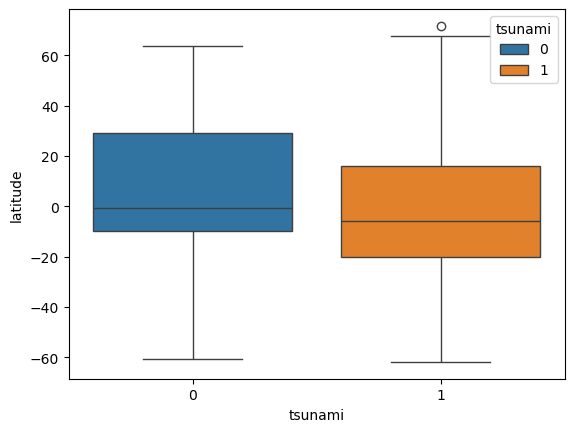

In [17]:
sns.boxplot(x="tsunami",y="latitude",hue="tsunami",data=df);

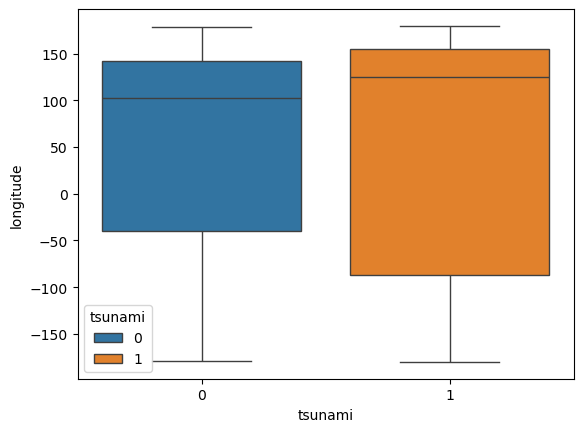

In [18]:
sns.boxplot(x="tsunami",y="longitude",hue="tsunami",data=df);

In [19]:
cuartilesLa = df.groupby('tsunami')['latitude'].quantile([0.25, 0.5, 0.75])
print(cuartilesLa)
cuartilesLo = df.groupby('tsunami')['longitude'].quantile([0.25, 0.5, 0.75])
print(cuartilesLo)

tsunami      
0        0.25    -9.778750
         0.50    -0.877000
         0.75    28.940500
1        0.25   -20.129125
         0.50    -6.036600
         0.75    16.033600
Name: latitude, dtype: float64
tsunami      
0        0.25    -39.984400
         0.50    102.420500
         0.75    142.454000
1        0.25    -86.942475
         0.50    125.037000
         0.75    155.453250
Name: longitude, dtype: float64


## Interpretation of Results (Latitude and Longitude)

The latitude average is -6, with the highest concentration of data between -15 and -6, and the longitude average is 125, with the highest concentration between approximately 125 and 155. This indicates that the coordinates suggest a higher number of tsunamis for the area encompassing Indonesia, Japan, etc. According to the data, this area is prone to tsunamis.

## NOTE
**The following code was used to convert latitudes and longitudes in countries using reverse-geocoder**\
**code:**\
*Isolating desired columns:*
 ``` 
df_direccion=df.drop(columns=["magnitude","depth","cdi","mmi","sig","Year","Month","nst","gap","dmin"]) \
df_direccion_tsunami = df_direccion.loc[df_direccion["tsunami"]>0] \
df_direccion = df_direccion_tsunami.drop(columns=["tsunami"])\
df_direccion
``` 

*Converting latitudes and longitudes to countries using reverse geocoder and storing it in a list:*
``` 
pais = []
	
for row in df_direccion.itertuples():
    location = rg.search((row.latitude, row.longitude))
    pais.append(location[0]["name"])
print(pais)
``` 
*Adding the list to a DataFrame:*
``` 
df_direccion["pais"] = pais
df_direccion
df_direccion.to_csv("C:/Users/EfrenMariscal/Downloads/df_direccion.csv",index=False)
```

In [22]:
df2 = pd.read_csv("C:/Users/EfrenMariscal/Downloads/df_zonas.csv")
df2.rename(columns={"pais":"zonas"},inplace=True)
df2

,latitude,longitude,zonas
0,-9.7963,159.596,Honiara
1,-20.0508,-178.346,Haveluloto
2,-19.2918,-172.129,Neiafu
3,-25.5948,178.278,Suva
4,-26.0442,178.381,Suva
...,...,...,...
299,1.1350,-77.393,Yacuanquer
300,-10.9280,166.018,Lata
301,-10.8380,165.969,Lata
302,-10.9970,165.655,Lata


In [23]:
df2["zonas"].value_counts().head(15)

zonas
Grytviken          13
Tadine             11
Panguna             9
Kirakira            8
Lata                8
Haveluloto          8
`Ohonua             8
Unalaska            7
Kokopo              7
Sand Point          6
Port-Olry           5
Punta de Burica     5
Alo                 4
Tongutisungi        4
Onagawa Cho         4
Name: count, dtype: int64

## Areas with the Most Tsunamis

The areas with the most recorded tsunamis are in similar locations, such as Indonesia, Japan, the Solomon Islands, etc. That is, along the coasts of Asia and Oceania. This entire region lies within the Pacific Ring of Fire. Tsunamis have also been recorded in parts of Alaska, as well as on a remote island in the Atlantic Ocean called Grytviken. Grytviken is an outlier, as it is the only island in this area with a very high frequency of tsunamis, ranking first.

## Applying Random Forests to Predict Tsunamis

The variables nst, gap, year, and month were removed, leaving only the variables that impact tsunami generation, such as magnitude, depth, etc.

In [24]:
#Determinando efectividad del modelo

features = ["magnitude","cdi","mmi","sig","depth","latitude","longitude"] # Ejemplo simplificado
X = df[features].fillna(df[features].median()) # Manejar Nulos
y = df['tsunami']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"Precisión: {accuracy_score(y_test, y_pred)}")
print("")

Precisión: 0.6942675159235668



In [26]:
#Determinando la variable con mas importancia que pueda determinar si ocurra o no un tsunami 
X_columnas = X_train.columns
importancia_var = rf_model.feature_importances_
df_importancia = pd.DataFrame({"variable":X_columnas,"importancia":importancia_var})
df_importancia = df_importancia.sort_values(by="importancia",ascending=False)
df_importancia

,variable,importancia
6,longitude,0.266070
5,latitude,0.203241
4,depth,0.138770
1,cdi,0.125100
3,sig,0.123632
0,magnitude,0.073672
2,mmi,0.069515


## Conclusion
*Tsunamis mostly occur in geologically unstable areas such as the Pacific Ring of Fire. It can be observed in random forests that geographic coordinates have a greater influence. One might initially think that magnitude, depth, or sign are determining factors for a tsunami to occur, but this is not the case.*